# Installation of libraries

In [ ]:
# Install CatBoost and upgrade scikit-learn library
!pip install catboost
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# Installation of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import joblib
from sklearn.feature_selection import RFECV
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_validate, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# Importing table from google drive

In [ ]:
# Download a file using gdown with the provided file ID
!gdown 1QgnJLMk3bYuzMRx8QN8KWp4eaFyCtX-Z

Downloading...
From: https://drive.google.com/uc?id=1QgnJLMk3bYuzMRx8QN8KWp4eaFyCtX-Z
To: /content/df_final.csv
100% 5.63M/5.63M [00:00<00:00, 33.3MB/s]


# Defining the dataframes

In [ ]:
# Read the CSV file 'df_final.csv' into the DataFrame df_final
df_final = pd.read_csv('/content/df_final.csv')

# Functions

In [ ]:
# Function to evaluate classification results
def evaluate(y_test, y_pred, y_proba):
    # Calculate precision, recall, F1-score, and AUC-ROC
    precision = precision_score(y_test, y_pred, average='macro') * 100
    recall = recall_score(y_test, y_pred, average='macro') * 100
    f1 = f1_score(y_test, y_pred, average='macro') * 100
    auc_roc = roc_auc_score(y_test, y_proba) * 100

    # Print evaluation metrics
    print(f" Precision: {precision:.2f}%")
    print(f" Recall: {recall:.2f}%")
    print(f" F1-score: {f1:.2f}%")
    print(f" AUC-ROC: {auc_roc:.2f}%\n")

    # Generate and display the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Model

At this stage, the data was separated between training and testing, to run the models without any hyperparameters. In it we had a better idea of what would happen with the cleaned data


## Split train / test

In [ ]:
# Remove the 'Unnamed: 0' column from the DataFrame df_final
df_final.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Prepare the feature matrix X and target vector y
X = df_final.drop(columns=['id', 'churn'])
y = df_final['churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## XGBClassifier

In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer

# Create an XGBoost classifier
xgb = XGBClassifier()

# Define scoring metrics for cross-validation
scoring = {
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
}

# Define a StratifiedKFold cross-validation strategy
stratified_kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=1)

# Perform cross-validation and calculate metrics
cv_results = cross_validate(xgb, X_train, y_train, cv=stratified_kfold, scoring=scoring, n_jobs=-1)

# Print the mean scores for each metric
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]}: {scores.mean() * 100:.2f}%")


In [ ]:
# Fit the XGBoost classifier to the training data
xgb.fit(X_train, y_train)

# Predict probabilities and class labels on the test data
y_prob = xgb.predict_proba(X_test)[:, 1]
y_pred = xgb.predict(X_test)

# Evaluate the model's performance using the 'evaluate' function
evaluate(y_test, y_pred, y_prob)

## Random Forest

In [ ]:
# Fits a RandomForestClassifier model to the training data and calculates the scores using the 'score' function.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

 Precision: 83.96%
 Recall: 52.24%
 F1-score: 52.10%
 AUC-ROC: 66.73%



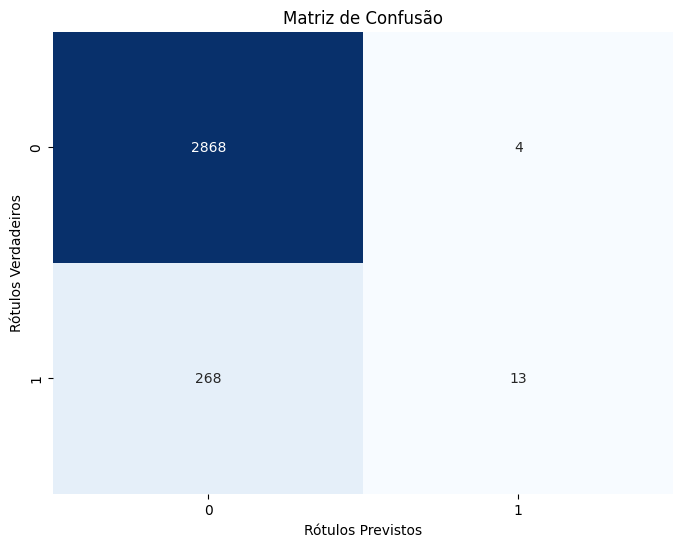

In [ ]:
# Predict probabilities and class labels on the test data using a random forest classifier (rf)
y_prob = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)

# Evaluate the model's performance using the 'evaluate' function
evaluate(y_test, y_pred, y_prob)

## Extra Trees Classifier

In [ ]:
# Fits an ExtraTreesClassifier model to the training data and calculates the scores using the 'score' function.
et = ExtraTreesClassifier()
et.fit(X_train, y_train)

In [ ]:
# Predict probabilities and class labels on the test data using an extra trees classifier (et)
y_prob = et.predict_proba(X_test)[:, 1]
y_pred = et.predict(X_test)

# Evaluate the model's performance using the 'evaluate' function
evaluate(y_test, y_pred, y_prob)

## Gradient Bossting Classifier

In [ ]:
# Fits a GradientBoostingClassifier model to the training data and calculates the scores using the 'score' function.
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

In [ ]:
# Predict probabilities and class labels on the test data using a gradient boosting classifier (gb)
y_prob = gb.predict_proba(X_test)[:, 1]
y_pred = gb.predict(X_test)

# Evaluate the model's performance using the 'evaluate' function
evaluate(y_test, y_pred, y_prob)

## CatBoost

In [ ]:
# Import the CatBoostClassifier
from catboost import CatBoostClassifier

# Define hyperparameters for the CatBoostClassifier
params = {
    'iterations': 2500,
    'depth': 7,
    'learning_rate': 0.01794,
    'loss_function': 'Logloss',
}

# Create a CatBoostClassifier with specified parameters
cat = CatBoostClassifier(verbose=500, random_state=1, **params)

# Fit the CatBoostClassifier to the training data and evaluate on the test set
cat.fit(X_train, y_train, eval_set=(X_test, y_test))

In [ ]:
# Predict probabilities and class labels on the test data using a CatBoostClassifier (cat)
y_prob = cat.predict_proba(X_test)[:, 1]
y_pred = cat.predict(X_test)

# Evaluate the model's performance using the 'evaluate' function
evaluate(y_test, y_pred, y_prob)

## Feature importance

In [ ]:
# Define colors for the bar plot based on a pastel color palette
colors = sns.color_palette("pastel", len(feature_importance_df['Feature'][:7]))

# Get feature importances from the random forest model (rf)
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a horizontal bar plot to visualize the top 7 most important features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:7], feature_importance_df['Importance'][:7], color=colors)
plt.xlabel('Importance')
plt.ylabel('Column')
plt.title('Top 7 Best Columns in the Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

# Best hiperparameters and features

Here, we were precise in understanding whether it was necessary to search for the best hyperparameters and the best features for the model. We concluded that they do not have such great relevance in the results

## Random Forest Regressor

###Seleção dos melhores parâmetros

In [ ]:
# Define a dictionary of hyperparameter ranges to search over
param_dist = {
    'n_estimators': np.arange(269, 279, 3),
    'max_depth': np.arange(40, 47, 2),
    'min_samples_split': np.arange(6, 12, 1),
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define a scoring metric (ROC AUC) to optimize for
scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    scoring=scorer,
    cv=5,
    n_iter=100,
    random_state=1,
    n_jobs=-1
)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the best ROC AUC score
print("Best Hyperparameters:", random_search.best_params_)
print("Best ROC AUC Score:", random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores Hiperparâmetros: {'n_estimators': 272, 'min_samples_split': 6, 'max_depth': 40}
Melhor Recall Score: 0.5126183497430994


In [ ]:
# Print the best hyperparameters found during the random search
print("Best Hyperparameters: ", random_search.best_params_)

# Get the best model from the random search
best_model_rf = random_search.best_estimator_

# Print the best model
print('Best Model:', best_model_rf)

Melhores Hiperparâmetros:  {'n_estimators': 272, 'min_samples_split': 6, 'max_depth': 40}
Best Model RandomForestClassifier(max_depth=40, min_samples_split=6, n_estimators=272)


###Aplicação do modelo com os hiperparâmetros e features

In [ ]:
# Set the variable 'rf' to the best model found during hyperparameter tuning
rf = best_model_rf

# Fit the best random forest model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data using the best model
predictionRF = rf.predict(X_test)

 Precision: 86.58%
 Recall: 51.57%
 F1-score: 50.80%
 AUC-ROC: 66.87%



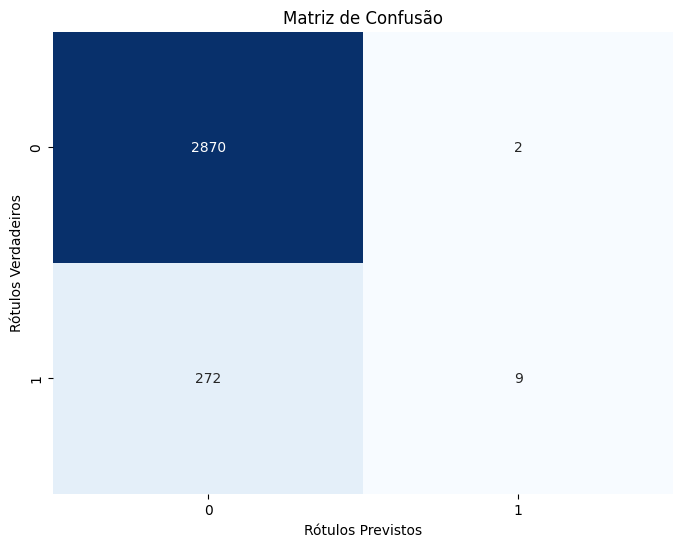

In [ ]:
# Predict probabilities and class labels on the test data using the best random forest model (rf)
y_prob = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)

# Evaluate the model's performance using the 'evaluate' function
evaluate(y_test, y_pred, y_prob)

## Gradient Boosting Classifier

### Seleção dos melhores parâmetros

In [ ]:
# Define a dictionary of hyperparameter ranges to search over for the GradientBoostingClassifier
param_dist = {
    'n_estimators': np.arange(170, 192, 3),
    'max_depth': np.arange(17, 27, 2),
    'min_samples_split': np.arange(23, 27, 1),
    'learning_rate': [0.1794]
}

# Create a GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(random_state=1)

# Define a scoring metric (Recall) to optimize for
scorer = make_scorer(recall_score, greater_is_better=True)

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=gb_classifier,
    param_distributions=param_dist,
    scoring=scorer,
    cv=5,
    n_iter=100,
    random_state=1,
    n_jobs=-1
)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the best Recall score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores Hiperparâmetros: {'n_estimators': 170, 'min_samples_split': 21, 'max_depth': 23, 'learning_rate': 0.1794}
Melhor Recall Score: 0.06380762700796656


In [ ]:
# Print the best hyperparameters found during the random search
print("Best Hyperparameters: ", random_search.best_params_)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Print the best model
print('Best Model:', best_model)

Melhores Hiperparâmetros:  {'n_estimators': 170, 'min_samples_split': 21, 'max_depth': 23, 'learning_rate': 0.1794}
Best Model GradientBoostingClassifier(learning_rate=0.1794, max_depth=23,
                           min_samples_split=21, n_estimators=170,
                           random_state=1)


### Aplicação do modelo com os hiperparâmetros e features

In [ ]:
# Set the variable 'gb' to the best model found during hyperparameter tuning
gb = best_model

# Fit the best GradientBoostingClassifier model to the training data
gb.fit(X_train, y_train)

# Make predictions on the test data using the best model
predictionGB = gb.predict(X_test)

 Precision: 80.23%
 Recall: 53.74%
 F1-score: 54.78%
 AUC-ROC: 65.99%



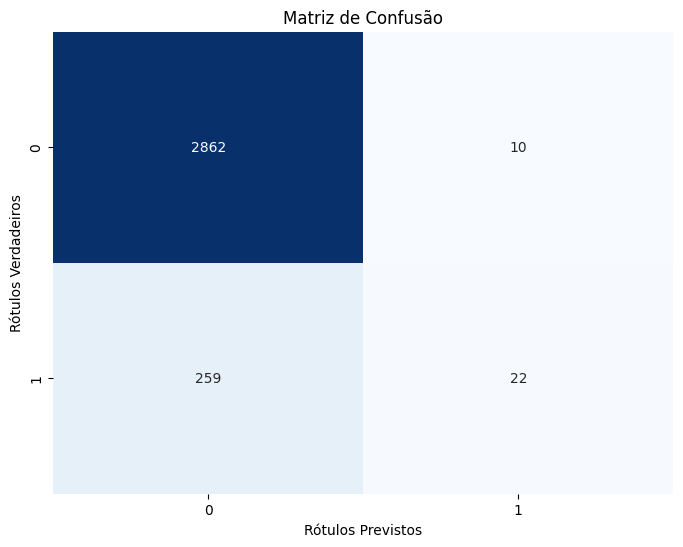

In [ ]:
# Predict probabilities and class labels on the test data using the best GradientBoostingClassifier model (gb)
y_prob = gb.predict_proba(X_test)[:, 1]
y_pred = gb.predict(X_test)

# Evaluate the model's performance using the 'evaluate' function
evaluate(y_test, y_pred, y_prob)

## Extreme Gradient Boosting Classifier(XGBoost)

### Seleção dos melhores parâmetros

In [ ]:
# Define a dictionary of hyperparameter ranges to search over for the XGBoost classifier
param_dist = {
    'n_estimators': np.arange(150, 250, 20),
    'max_depth': np.arange(20, 50, 5),
    'min_child_weight': np.arange(5, 15, 2),
    'learning_rate': [0.0174, 0.174]
}

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=1)

# Define a scoring metric (Recall) to optimize for
scorer = make_scorer(recall_score, greater_is_better=True)

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_dist,
    scoring=scorer,
    cv=5,
    n_iter=100,
    random_state=42
)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the best Recall score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)

In [ ]:
# Print the best hyperparameters found during the random search
print("Best Hyperparameters: ", random_search.best_params_)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Print the best model
print('Best Model:', best_model)

### Aplicação do modelo com os hiperparâmetros e features

In [ ]:
# Create an XGBoost classifier with the best hyperparameters found during tuning
xgb_classifier = xgb.XGBClassifier(max_depth=20, n_estimators=150, random_state=1)

# Fit the XGBoost classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data using the XGBoost classifier
predictionXGB = xgb_classifier.predict(X_test)

In [ ]:
# Predict probabilities and class labels on the test data using the XGBoost classifier (xgb_classifier)
y_prob = xgb_classifier.predict_proba(X_test)[:, 1]
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model's performance using the 'evaluate' function
evaluate(y_test, y_pred, y_prob)

## CatBoost

### Seleção dos melhores parâmetros

In [ ]:
# Define a dictionary of hyperparameter ranges to search over for the CatBoostClassifier
param_dist = {
    'iterations': np.arange(150, 250, 20),
    'depth': np.arange(20, 50, 5),
    'min_child_samples': np.arange(5, 15, 2),
    'learning_rate': [0.0174, 0.174]
}

# Create a CatBoostClassifier
catboost_classifier = CatBoostClassifier(random_seed=1, verbose=0)

# Define a scoring metric (Recall) to optimize for
scorer = make_scorer(recall_score, greater_is_better=True)

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=catboost_classifier,
    param_distributions=param_dist,
    scoring=scorer,
    cv=5,
    n_iter=100,
    random_state=42
)

# Fit the randomized search to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the best Recall score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Recall Score:", random_search.best_score_)

In [ ]:
# Print the best hyperparameters found during the random search
print("Best Hyperparameters: ", random_search.best_params_)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Print the best model
print('Best Model:', best_model)

### Aplicação do modelo com os hiperparâmetros e features

In [ ]:
# Create an XGBoost classifier with specified hyperparameters
cat = xgb.XGBClassifier(max_depth=20, n_estimators=150, random_state=1)

# Fit the XGBoost classifier to the training data
cat.fit(X_train, y_train)

# Make predictions on the test data using the XGBoost classifier
predictioncat = cat.predict(X_test)

In [ ]:
# Predict probabilities and class labels on the test data using the XGBoost classifier (cat)
y_prob = cat.predict_proba(X_test)[:, 1]
y_pred = cat.predict(X_test)

# Evaluate the model's performance using the 'evaluate' function
evaluate(y_test, y_pred, y_prob)

# Exporting

In [ ]:
# Save the Random Forest model (rf) to a joblib file
joblib.dump(rf, 'RandomForestModel.joblib')

['RandomForestModel.joblib']

# Conclusion

The model chosen so far is random forest. This choice is made because it is a model that, despite being very similar to the others in terms of metrics, adapts very well to unbalanced data, which we have in the databases.
The metrics used to evaluate these models are accuracy, precision, recall, F1_Score and AUC--ROC. However, the metrics that really have significant importance for our analysis are AUC-ROC and recall. In our tests, these metrics haven't performed very well yet.
The conclusion we were able to draw is that we are on the right path, but we must make changes to feature engineering, more specifically to the pricing table.